### @WSS21: Winter-Spring School

Jupyter Notebook Author: Naresh Adhikari

5th Week 20th June 2021


### Bayesian Inference and Analysis (II)

In [ ]:
# Please visit this web page for bilby: https://lscsoft.docs.ligo.org/bilby/installation.html

In [9]:
import bilby

In [10]:
bilby.__version__


'0.6.1:'

In [11]:
interferometers = bilby.gw.detector.get_event_data("GW150914")

23:24 bilby WARNING : Parameter estimation for real interferometer data in bilby is in alpha testing at the moment: the routines for windowing and filtering have not been reviewed.
23:24 bilby INFO    : Using cached data from outdir/H1_1126259460.4_1126259464.4.txt
23:24 bilby INFO    : Low pass filter frequency of 2048.0Hz requested, this is equal or greater than the Nyquist frequency so no filter applied
23:24 bilby INFO    : Using cached data from outdir/H1_1126258440.4_1126258540.4.txt
23:24 bilby INFO    : Low pass filter frequency of 2048.0Hz requested, this is equal or greater than the Nyquist frequency so no filter applied
23:24 bilby INFO    : Tukey window PSD data with alpha=0.1, roll off=0.2
23:24 bilby INFO    : Generating frequency domain strain from given time domain strain.
23:24 bilby INFO    : Applying a tukey window with alpha=0.1, roll off=0.2
23:24 bilby WARNING : Parameter estimation for real interferometer data in bilby is in alpha testing at the moment: the routi

In [14]:
prior = bilby.gw.prior.BBHPriorDict()
time_of_event = 1126259462.4

# help(prior)
from bilby.core.prior import Uniform
# import numpy as np

# prior = bilby.core.prior.PriorDict()
# prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=30.0,maximum=32.5)
# prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
# prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
# prior['a_1'] =  0.0
# prior['a_2'] =  0.0
# prior['tilt_1'] =  0.0
# prior['tilt_2'] =  0.0
# prior['phi_12'] =  0.0
# prior['phi_jl'] =  0.0
# prior['dec'] =  -1.2232
# prior['ra'] =  2.19432
# prior['theta_jn'] =  1.89694
# prior['psi'] =  0.532268
# prior['luminosity_distance'] = 412.066
# prior['mass_2'] = bilby.gw.prior.Constraint(minimum=10, maximum=80, name='mass_2', latex_label='$m_2$', unit=None)  

23:24 bilby INFO    : No prior given, using default BBH priors in /home/naresh/anaconda3/envs/igwn-py37/lib/python3.7/site-packages/bilby/gw/prior_files/binary_black_holes.prior.


In [15]:
likelihood = bilby.gw.likelihood.get_binary_black_hole_likelihood(interferometers)


23:24 bilby WARNING : The waveform_generator start_time is not equal to that of the provided interferometers. Overwriting the waveform_generator.


In [16]:
 result = bilby.core.sampler.run_sampler(likelihood,prior) 
# help(bilby.core.sampler.run_sampler)

23:24 bilby INFO    : Running for label 'label', output will be saved to 'outdir'
23:24 bilby INFO    : Using LAL version Branch: None;Tag: lal-v6.22.0;Id: 38829b72bfb5f26391b9866d286dd77db7942dd1;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
23:24 bilby INFO    : Search parameters:
23:24 bilby INFO    :   mass_1 = Uniform(minimum=5, maximum=100, name='mass_1', latex_label='$m_1$', unit='$M_{\\odot}$', boundary=None)
23:24 bilby INFO    :   mass_2 = Uniform(minimum=5, maximum=100, name='mass_2', latex_label='$m_2$', unit='$M_{\\odot}$', boundary=None)
23:24 bilby INFO    :   a_1 = Uniform(minimum=0, maximum=0.8, name='a_1', latex_label='$a_1$', unit=None, boundary='reflective')
23:24 bilby INFO    :   a_2 = Uniform(minimum=0, maximum=0.8, name='a_2', latex_label='$a_2$', unit=None, boundary='reflective')
23:24 bilby INFO    :   tilt_1 = Sine(name='tilt_1', latex_label='$\\theta_1$', unit=None, minimum=0, maximum=3.1415926535897

0it [00:00, ?it/s]

23:24 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': None, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f8fc0b18f10>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
23:24 bilby INFO    : Checkpoint every n_check_point = 200000
23:24 bilby INFO    : Using dynesty version 1.0.1
23:24 bilby INFO    : Using the bilby-implemented rwalk samp

37717it [00:08, 4601.37it/s, bound:0 nc:1 ncall:17457494 eff:0.2% logz-ratio=277.22+/-0.25 dlogz:0.000>0.10]



23:25 bilby INFO    : Sampling time: 1 day, 0:11:26.234315
23:25 bilby INFO    : Summary of results:
nsamples: 38717
log_noise_evidence: -1165928.132
log_evidence: -1165650.914 +/-  0.253
log_bayes_factor: 277.217 +/-  0.253



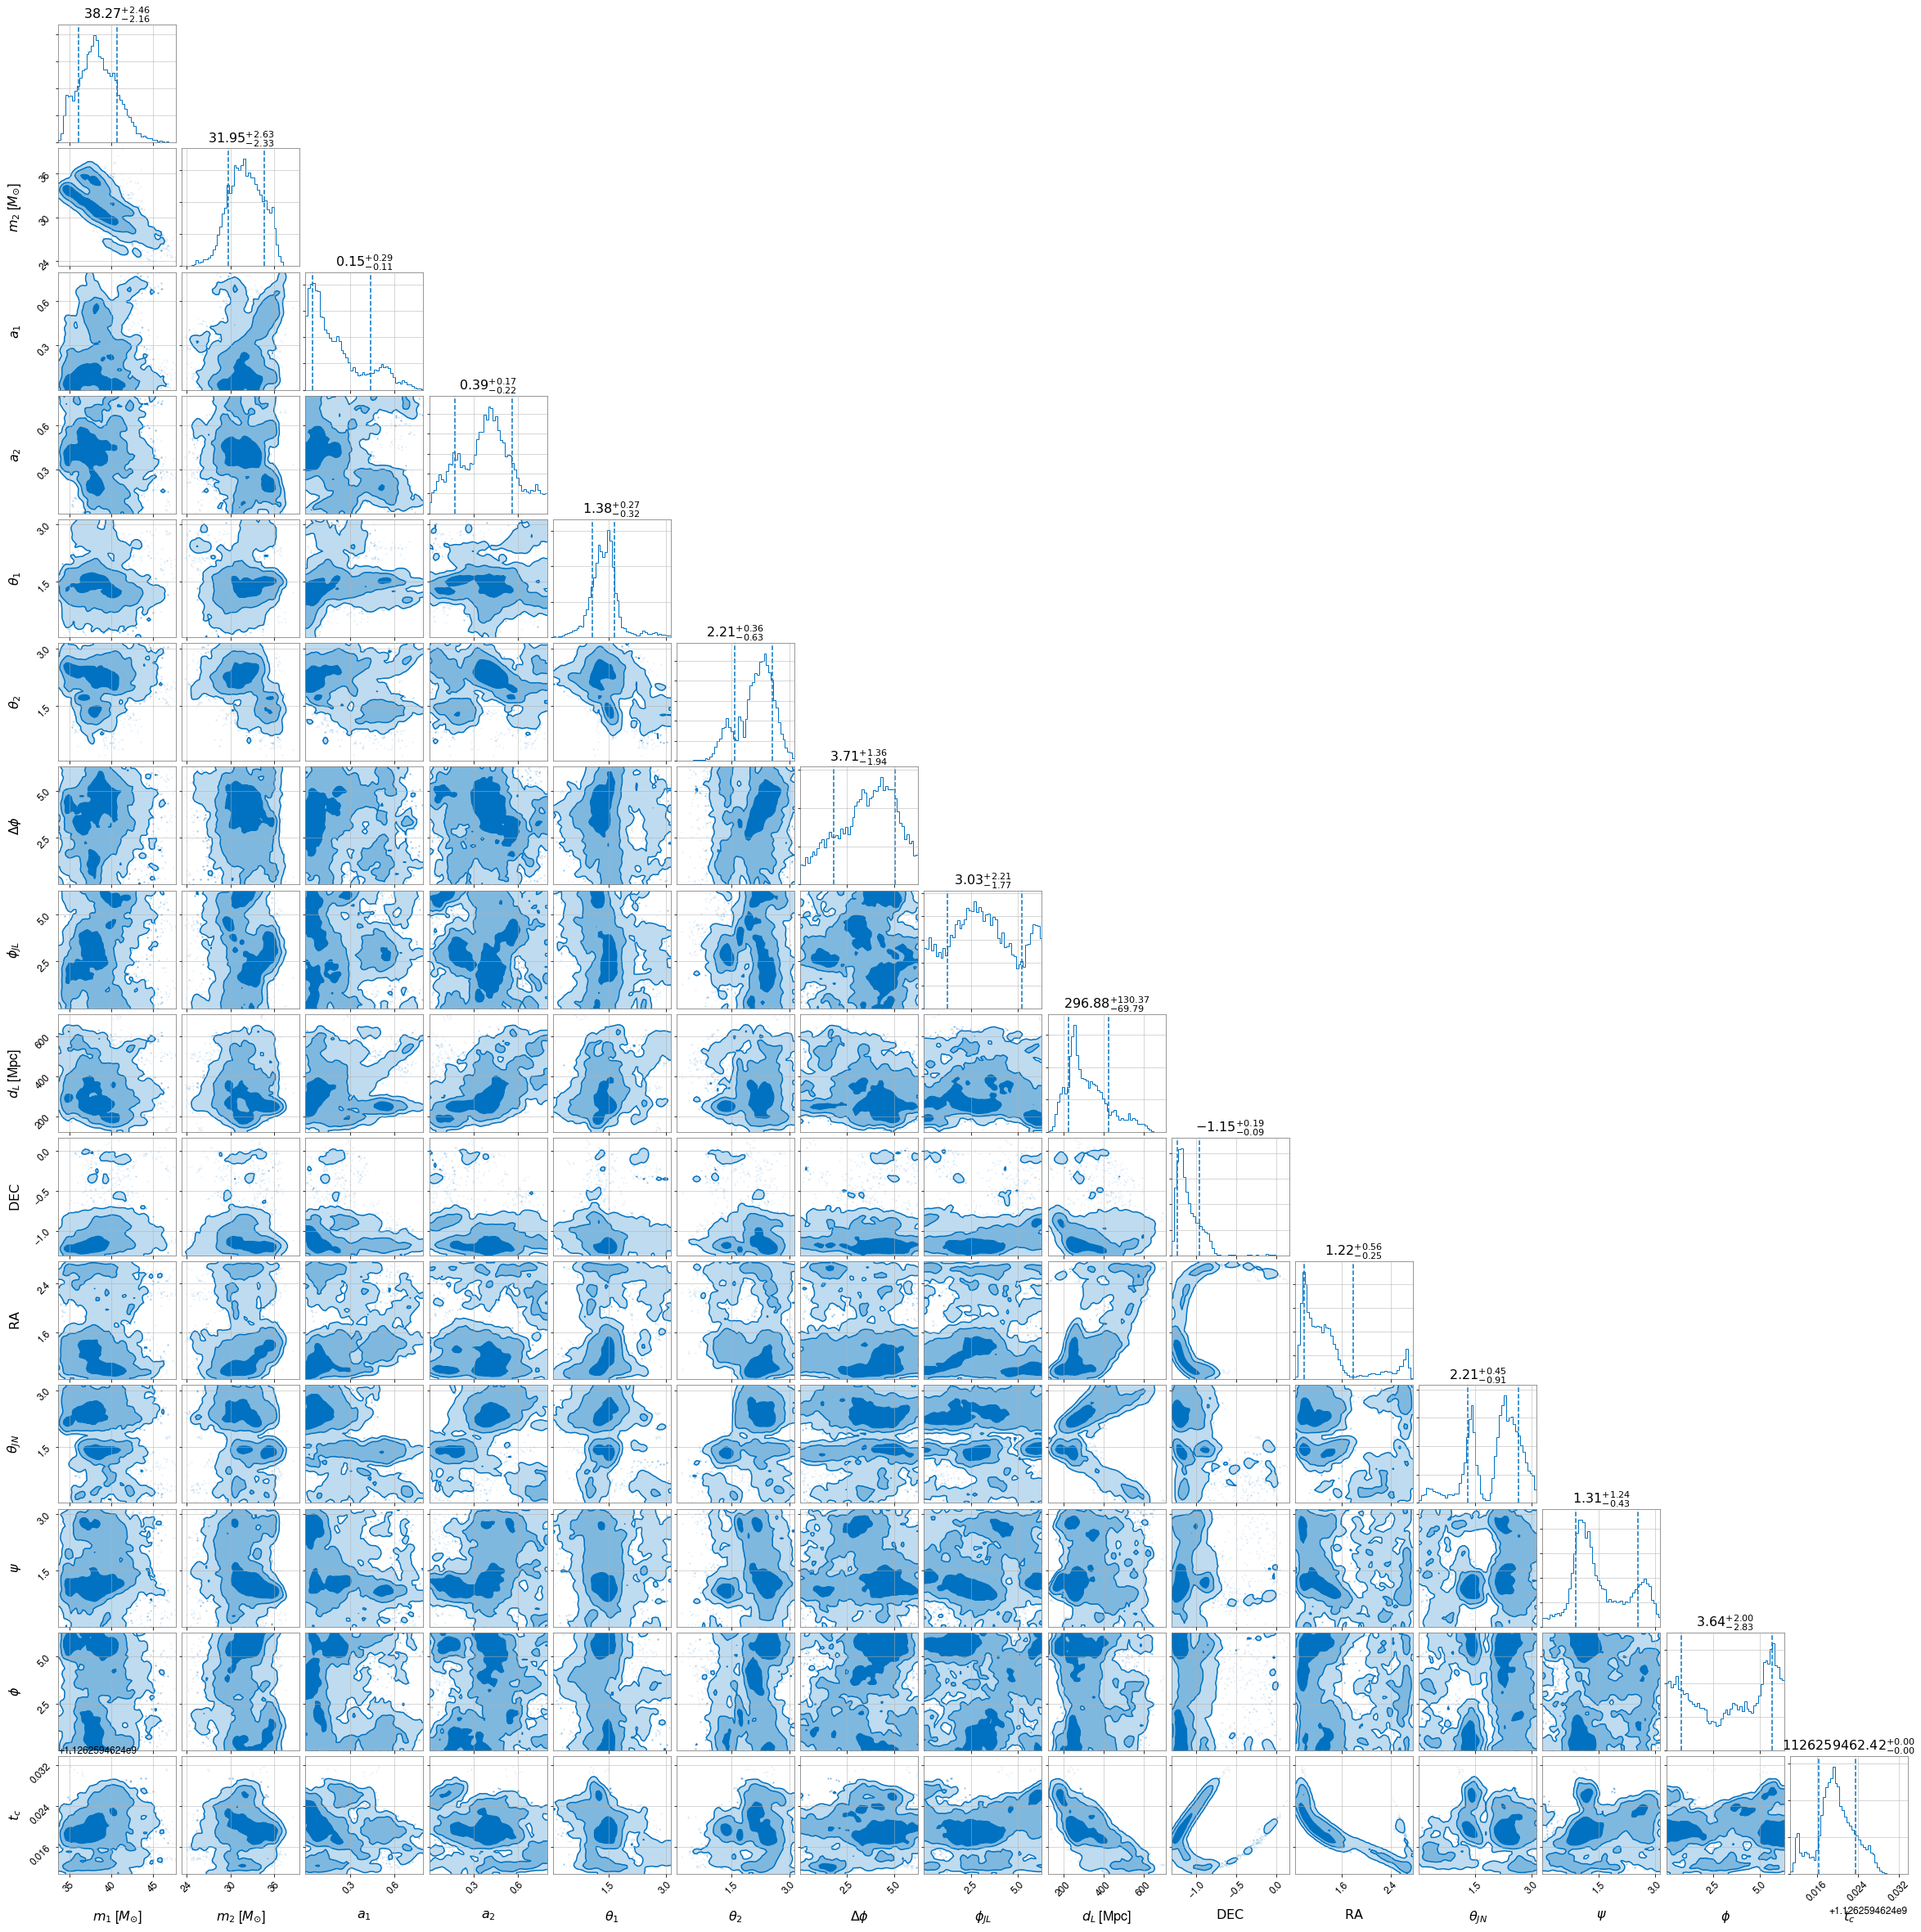

In [17]:
result.plot_corner()

In [18]:
import numpy as np

In [19]:
pwd

'/home/naresh'

In [20]:
ls


 anaconda3/                                outdir/
 a.out*                                    outdir1/
 astrops11.py*                             Physics718-PS1.ipynb
 bayesian-inference-bilby-GW150914.ipynb   Physics718-PS4-4b.py
 bilby/                                    Physics718-PS4-5.py
 blockchain                                Pictures/
 cit_jobs_webdir                           ppdot.dat
 cr_data.txt                               ps4.py
'Data analysis'/                           ps5-1c.py
 data_analysis.ipynb                       ps5-5.py
 Desktop/                                  Public/
 Documents/                               'pycharm cmd'
 Downloads/                                PycharmProjects/
 firstprog.cc                             'python for data analysis.ipynb'
 GW150914_chirp_prior.ipynb                rochelobeapprox.py
 GW150914prior.ipynb                       snap/
 GW170818.ipynb                            SysCheck*
 GW190521_posterior_samples.ipynb      

In [21]:
cd outdir/

/home/naresh/outdir


In [22]:
ls


bns_eos_example.log                    H1_1126258440.4_1126258540.4.txt
gaussian_example_checkpoint_trace.png  H1_1126259460.4_1126259464.4.txt
gaussian_example_corner.png            H1_frequency_domain_data.png
gaussian_example_dynesty.pickle        H1_GW150914_frequency_domain_data.png
gaussian_example_result.json           H1_GW170818_frequency_domain_data.png
gaussian_example_resume.pickle         H1_GW190521_frequency_domain_data.png
GW150914_checkpoint_trace.png          H1_PSD_1126258440.3999023_100.0.txt
GW150914_chirpprior.log                L1_1126258440.4_1126258540.4.txt
GW150914_corner.png                    L1_1126259460.4_1126259464.4.txt
GW150914_dynesty.pickle                L1_frequency_domain_data.png
GW150914.log                           L1_GW150914_frequency_domain_data.png
GW150914_result.json                   L1_GW170818_frequency_domain_data.png
GW150914_result.json.old               L1_GW190521_frequency_domain_data.png
GW150914_resume.pickle                 

In [23]:
result0 = bilby.result.read_in_result(filename = '/home/naresh/outdir/label_result.json')

In [24]:
result0

In [25]:
result0.posterior

mass_1     mass_2       a_1       a_2    tilt_1    tilt_2    phi_12  \
0      39.458685  35.739980  0.418736  0.737916  2.386977  0.758743  5.779740   
1      37.287125  36.725402  0.482867  0.683508  2.329424  0.644393  0.016075   
2      46.557598  26.744127  0.144956  0.286089  1.505947  1.862356  3.361503   
3      41.413574  35.267239  0.251926  0.328374  1.027929  1.748599  4.806271   
4      46.591166  26.977193  0.191685  0.284401  1.458425  1.942216  2.540574   
...          ...        ...       ...       ...       ...       ...       ...   
38712  37.360029  33.053774  0.122141  0.453887  1.151978  2.042149  3.924916   
38713  35.650953  33.029104  0.158171  0.586066  1.346129  2.160555  3.653862   
38714  35.650953  33.029104  0.158171  0.586066  1.346129  2.160555  3.653862   
38715  35.650953  33.029104  0.158171  0.586066  1.346129  2.160555  3.653862   
38716  35.650953  33.029104  0.158171  0.586066  1.346129  2.160555  3.653862   

         phi_jl  luminosity_distance       dec        ra  theta_jn       psi  \
0      4.061346           536.121571 -1.051259  2.525450  0.782714  3.105812   
1      4.239662           389.019594 -1.158234  2.170462  0.858375  3.029308   
2      5.636115           271.024956 -0.608825  0.926543  1.096876  1.155767   
3      5.422223           413.289787 -0.728329  2.673197  1.116863  1.223327   
4      5.894219           226.653855 -0.597400  0.972108  1.163501  0.827050   
...         ...                  ...       ...       ...       ...       ...   
38712  6.091390           346.976501 -1.135478  1.067815  2.646971  1.754797   
38713  0.690480           299.856955 -1.166962  1.100299  2.467721  1.071471   
38714  0.690480           299.856955 -1.166962  1.100299  2.467721  1.071471   
38715  0.690480           299.856955 -1.166962  1.100299  2.467721  1.071471   
38716  0.690480           299.856955 -1.166962  1.100299  2.467721  1.071471   

          phase  geocent_time  log_likelihood  log_prior  
0      3.971281  1.126259e+09      292.678435 -30.369756  
1      5.371720  1.126259e+09      293.630825 -31.102696  
2      2.207156  1.126259e+09      294.211545 -30.052206  
3      5.726069  1.126259e+09      294.597103 -29.551437  
4      2.577850  1.126259e+09      294.858574 -30.358812  
...         ...           ...             ...        ...  
38712  4.276459  1.126259e+09      312.532831 -31.084417  
38713  5.627657  1.126259e+09      312.623880 -31.133746  
38714  5.627657  1.126259e+09      312.623880 -31.133746  
38715  5.627657  1.126259e+09      312.623880 -31.133746  
38716  5.627657  1.126259e+09      312.623880 -31.133746  

[38717 rows x 17 columns]

In [26]:
mass1_values = result0.posterior['mass_1']

In [27]:
dist = result0.posterior["luminosity_distance"].values


In [28]:
dist.shape

(38717,)

In [29]:
import corner

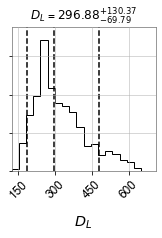

In [30]:
figure = corner.corner(dist, labels = [r"$D_{L}$"], quantiles=[0.05,0.5, 0.9], show_titles= True, title_kwargs={"fontsize": 12})


In [31]:
log_likelihood = result0.posterior['log_likelihood'].values

In [32]:
log_likelihood

array([292.67843476, 293.63082525, 294.21154521, ...,
       312.62387971, 312.62387971, 312.62387971])

In [26]:
import matplotlib.pyplot as plt